# Question 2 Part 1
- For this question, I am trying to analyze sentiments of authors of NYTimes.com on the current and former president of US
- For this analysis I have used the article search api to get data for President Donald Trump and former President Barrack Obama

In [1]:
#Getting api-key from the environment
import os
nyt_article_key = os.getenv('nyt_article_key')


In [3]:
#Importing bunch of data using articlesearch api-key
import requests
from pprint import pprint
import json
import time
for i in range(0, 120):
    j=str(i)
    r = requests.get("http://api.nytimes.com/svc/search/v2/articlesearch.json?q=trump&page="+j+"&api-key="+nyt_article_key)   
    data = r.json()
    time.sleep(5)
    #print(len(data))
    #pprint(data)
    with open("data/datatrump"+j+".json", 'w') as outfile:
        json.dump(data, outfile)

In [1]:
#Reading Obama data to understand the data from multiple json files
import glob
import json
from pprint import pprint
json_files=glob.glob("data/dataobama1.json")
for file in json_files:
    with open(file) as data_file:
        data = json.load(data_file)
        #pprint(data)

In [5]:
#Getting list of positive and negative words from csv for analysis
positive_list = []
negative_list = []
import csv

        
with open('que[2]/ana_[2]/positive.csv','r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        positive_list.append(row[0])

with open('que[2]/ana_[2]/negative.csv','r') as csvfile:
    rows = csv.reader(csvfile)
    for row in rows:
        negative_list.append(row[0])  
        
#print(negative_list)

In [14]:
#Analysis 1: Analyzing number of articles regarding Obama which are positive or negative

In [6]:
#Reading Obama data
import glob
import json
files = []
json_files = glob.glob('data/dataobama*.json')

In [7]:
#Determining if an article is positive or negative about Obama
o_main_pos = 0
o_main_neg = 0
o_main_neu = 0
Obama_graph = []
for file in json_files:
    with open(file) as data_file:
        data = json.load(data_file)
        x = len(data['response']['docs'])
        print(x)
        try:
            for i in range (0,x):
                content=data['response']['docs'][i]['lead_paragraph']
                print(content)
                content = content.split()
                count_pos = 0
                count_neg = 0
                for word in content:
                    if word in positive_list:
                        count_pos = count_pos + 1
                    if word in negative_list:
                        count_neg = count_neg + 1   
                if count_pos > count_neg:
                    print("Positive")
                    o_main_pos = o_main_pos+1
                elif count_pos < count_neg:
                    print("Negative")
                    o_main_neg = o_main_neg+1
                else:
                    print("Neutral")
                    o_main_neu = o_main_neu+1
                print(count_pos)
                print(count_neg)
        except KeyError:
            pass
        except AttributeError:
            pass
print("Number of positive articles about Obama:")
print(o_main_pos)
print("Number of negative articles about Obama:")
print(o_main_neg)
print("NUmber of neutral articles about Obama:")
print(o_main_neu)
Obama_graph.append(o_main_pos)
Obama_graph.append(o_main_neg)
Obama_graph.append(o_main_neu)

10
Monday in Independence, Mo.:
Neutral
0
0
Senator Barack Obama, speaking on Wednesday afternoon at a rally in the Reunion Arena in Dallas, as recorded and transcribed by The New York Times.
Neutral
0
0
Senator Barack Obama, Democrat of Illinois, speaking Wednesday in Mason City, Iowa.
Neutral
0
0
A poster-driven campaign calling for the former American president to become France’s next leader, started as a joke between friends, has gained tens of thousands of signatures online.
Neutral
1
1
The former president, who has kept a low profile since leaving office in January, visited New York to see “The Price” with his elder daughter, Malia.
Neutral
0
0
I found him to be tough, smart, shrewd, very unsentimental, very pragmatic. And on areas where we disagree, like Georgia, I don't anticipate a meeting of the minds anytime soon. PRESIDENT OBAMA, on Prime Minister Vladimir V. Putin of Russia. [A10]
Positive
1
0
Look, I wish I had the luxury of just dealing with a modest recession or just de

In [8]:
Obama_graph

[274, 277, 443]

In [15]:
#Writing output to the csv
with open("que[2]/ana_[2]/Obama_Article_Analysis.csv","w",encoding='utf-8') as myfile1:
    writer = csv.writer(myfile1, lineterminator='\n')
    writer.writerow(["Number of Positive Articles","Number of Negative Articles","Number of Neutral Articles"])
    writer.writerow([Obama_graph[0],Obama_graph[1],Obama_graph[2]])

In [16]:
#Analysis 2: Analyzing number of articles regarding Trump which are positive or negative

In [17]:
#Reading Trump data
import glob
import json
files = []
json_files = glob.glob('data/datatrump*.json')

In [18]:
#Determining if an article is positive or negative about Trump
t_main_pos = 0
t_main_neg = 0
t_main_neu = 0
Trump_graph = []
for file in json_files:
    with open(file) as data_file:
        data = json.load(data_file)
        x = len(data['response']['docs'])
        print(x)
        try:
            for i in range (0,x):
                content=data['response']['docs'][i]['lead_paragraph']
                print(content)
                content = content.split()
                count_pos = 0
                count_neg = 0
                for word in content:
                    if word in positive_list:
                        count_pos = count_pos + 1
                    if word in negative_list:
                        count_neg = count_neg + 1   
                if count_pos > count_neg:
                    print("Positive")
                    t_main_pos = t_main_pos+1
                elif count_pos < count_neg:
                    print("Negative")
                    t_main_neg = t_main_neg+1
                else:
                    print("Neutral")
                    t_main_neu = t_main_neu+1
                print(count_pos)
                print(count_neg)
        except KeyError:
            pass
        except AttributeError:
            pass
print("Number of positive articles about Trump:")
print(t_main_pos)
print("Number of negative articles about Trump:")
print(t_main_neg)
print("NUmber of neutral articles about Trump:")
print(t_main_neu)
Trump_graph.append(t_main_pos)
Trump_graph.append(t_main_neg)
Trump_graph.append(t_main_neu)

10
Protesters in Manhattan sat down across an avenue, blocking cars and trucks, in a display the rabbinical group’s leader said was meant to show that many Jews opposed the travel ban.
Neutral
0
0
A photo of the president's son and three others at the Trump SoHo hotel in 2010 provides a peek at some of his past associates, how they interacted with him and what they are doing today. 
Neutral
0
0
Two new developments highlight the complications created when the president of the United States owns a sprawling real estate company.
Neutral
0
0
Laurence Tribe and Mark Green are among those urging the Trump family to divest to avoid the potential for corruption.
Neutral
0
0
Conflict-of-interest questions arose after a party at which Mr. Trump praised Hussain Sajwani, whose company has built several properties bearing the Trump name.
Neutral
0
0
Mark Ruffalo, Cher and Robert DeNiro appeared in Manhattan, in what organizers hoped would develop into a weekend of rallies against the new president

In [19]:
Trump_graph

[240, 397, 518]

In [20]:
#Writing output to the csv
with open("que[2]/ana_[2]/Trump_Article_Analysis.csv","w",encoding='utf-8') as myfile1:
    writer = csv.writer(myfile1, lineterminator='\n')
    writer.writerow(["Number of Positive Articles","Number of Negative Articles","Number of Neutral Articles"])
    writer.writerow([Trump_graph[0],Trump_graph[1],Trump_graph[2]])

In [21]:
#Analysis 3: Lets try to analyze number of positive and negative articles for both, Obama and Trump at the same time with the
#help of a graph

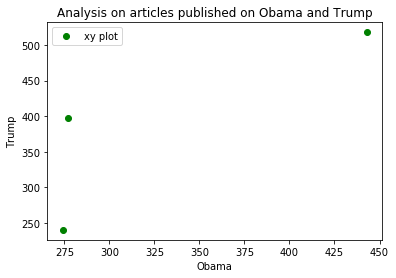

In [22]:
#Plotting graph for analysis
import matplotlib.pyplot as plt                                                  #importing matlpotlib          

plt.plot(Obama_graph,Trump_graph, 'go',label='xy plot')                                       
plt.xlabel('Obama')
plt.ylabel('Trump')
plt.title("Analysis on articles published on Obama and Trump")
plt.legend()
plt.show()

In [23]:
#Thus we can conclude that NYTimes.com do publish articles which are more neutral in case of Obama.
#Also we can see that NYTimes.com do publish a lot of negative articles in case of Trump
#From the graph we can also analyze, in case of positive articles, when 240 positive articles about Trump were published,
#274 positive articles about Obama were published.
#While in case of negative articles when 277 negative articles regarding Obama, a considerable amount of 397 negative articles
#were published about Trump.
#Thus, we can conclude that most of the authors of NYTimes.com of the articles write in favor of Obama.